<html>
<div>
  <img src="https://www.engineersgarage.com/wp-content/uploads/2021/11/TCH36-01-scaled.jpg" width=360px width=auto style="vertical-align: middle;">
  <span style="font-family: Georgia; font-size:30px; color: white;"> <br/> University of Tehran <br/> AI_CA0 <br/> Spring 02 </span>
</div>
<span style="font-family: Georgia; font-size:15pt; color: white; vertical-align: middle;"> low_mist - std id: 810100186 </span>
</html>

In this notebook, we will be learning about data manipulation techniques to prepare datasets for machine learning models. Specifically, we will work with a dataset containing information about employees such as their salaries, education level, years of experience, and other attributes.  
Our goal is to build a machine learning model that can predict the salary of employees based on their attributes. To do this, we will need to first explore and clean the dataset, handle any missing values, encode categorical variables, split the data into training and test sets, and finally train a model on the training set and evaluate it on the test set.

In [1]:
import numpy as np
import matplotlib.axes as pltaxes
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
import timeit

TRAIN_FILE_ADDRESS = "assets/data/train.csv"
TEST_FILE_ADDRESS = "assets/data/test.csv"

1- The given csv has information about almost 30 thousand people, information such as:

- Age - The age of the person in years
- Workclass - The category of employer, such as private, self-employed, federal government, etc.  
- Fnlwgt - A sample weight, used to adjust for the fact that some groups were oversampled in the dataset
- Education-num - The highest level of education completed in number of years
- Marital-status - Marital status, such as married, divorced, never married, etc.
- Occupation - The occupation of the person
- Relationship - Relationship to the head of household, such as spouse, own-child, unmarried partner, etc.  
- Race - Race of the person  
- Sex - Gender of the person
- Capital-gain - Monetary capital gains received by the person
- Capital-loss - Monetary capital losses received by the person 
- Hours-per-week - Average number of hours worked per week
- Native-country - Birth country of the person
- **Salary** - The target variable, whether the person earns over 50K per year or not


In [2]:
train_df = pd.read_csv(TRAIN_FILE_ADDRESS)

In [3]:
display(train_df)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29820,48,Local-gov,127921,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
29821,32,Private,42617,Some-college,10,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,30,United-States,<=50K
29822,47,Local-gov,191389,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,35,United-States,<=50K
29823,38,Private,187983,Prof-school,15,Married-civ-spouse,Sales,Wife,White,Female,0,0,40,United-States,<=50K


``info``:   
The info method in a database provides metadata about the columns in a table. It returns information such as the name of each column, the data type (integer, string, date etc.) of the values in that column, and the number of non-null values. This helps understand the structure of the data in a table without needing to view all rows.

The column names are displayed which helps identify the fields of information being stored. The data type of each column indicates what kind of data is allowed to be stored such as numbers, text, dates. Knowing the data types upfront helps write queries compatible with the columns. 

The count of non-null values is useful to know if a column contains data for all rows or if it is partially filled. Columns with very few non-null values may need to be handled differently than columns with data for most rows. Together, this metadata from the info method provides crucial insights into the database structure before writing queries or analyzing the data.

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29825 entries, 0 to 29824
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29825 non-null  int64 
 1   workclass       28154 non-null  object
 2   fnlwgt          29825 non-null  int64 
 3   education       29825 non-null  object
 4   education-num   29825 non-null  int64 
 5   marital-status  29825 non-null  object
 6   occupation      28149 non-null  object
 7   relationship    29825 non-null  object
 8   race            29825 non-null  object
 9   sex             29825 non-null  object
 10  capital-gain    29825 non-null  int64 
 11  capital-loss    29825 non-null  int64 
 12  hours-per-week  29825 non-null  int64 
 13  native-country  29288 non-null  object
 14  salary          29825 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.4+ MB


``head and tail``:  
are common data exploration techniques used to get an initial understanding of a dataset. The "head" method displays the first few rows of data, usually the first 5 rows. This allows users to get a sense of the column names, data types, and values at the beginning of the dataset. Similarly, the "tail" method shows the last few rows of data, commonly the last 5 rows. Using tail provides insight into the data types and values at the end of the dataset. 

Together, head and tail give users a quick way to peek at the start and end of data without viewing all rows. This is useful for datasets that are too large to view in their entirety. Head and tail help identify any patterns, outliers, or data quality issues that exist at the edges of the data. They also help users decide if any data cleaning may be needed before further analysis. The number of rows shown can be customized, such as head(10) to see the first 10 rows instead of the usual 5. Head and tail are therefore simple yet effective methods for getting an initial understanding of dataset structure and content.

In [5]:
train_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
train_df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
29820,48,Local-gov,127921,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
29821,32,Private,42617,Some-college,10,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,30,United-States,<=50K
29822,47,Local-gov,191389,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,35,United-States,<=50K
29823,38,Private,187983,Prof-school,15,Married-civ-spouse,Sales,Wife,White,Female,0,0,40,United-States,<=50K
29824,18,Private,215110,HS-grad,9,Never-married,Handlers-cleaners,Own-child,Black,Male,0,0,40,United-States,<=50K


``describe``:

The describe method provides a summary of key statistics about each numerical column in a dataframe. It is useful for getting a quick overview of the data distribution and identifying any potential outliers or issues.

When called on a dataframe, describe will calculate and return the following statistics for each column:

- Count - The number of non-null (i.e. not NaN or missing) values in the column. This gives you an idea of how much data is present.

- Mean - The average value of all numbers in the column. The mean tells you the central tendency of the data. 

- Standard Deviation - A measure of how spread out the numbers are from the mean. A high standard deviation indicates a wide spread, while a low one shows the values are clustered closely around the mean.

- 25th Percentile, 50th Percentile, 75th Percentile - These split the column into quarters based on the distribution. The 50th percentile is the median. Together they reveal the shape and spread of the distribution.

- Minimum - The lowest non-null value in the column. Useful for identifying potential outliers.

- Maximum - The highest non-null value. Also helps identify outliers at the other end.


In [7]:
train_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,29825.000000,2.982500e+04,29825.000000,29825.000000,29825.000000,29825.000000
mean,38.581425,1.897389e+05,10.079229,1094.586052,86.476513,40.434334
std,13.652005,1.053738e+05,2.571678,7485.908646,401.195078,12.308174
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178490e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.785170e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.368790e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


2 - Now we should use `label encoding` further processing, it is the process of converting categorical variable values into numeric values. This is commonly done when preparing categorical data for machine learning models.  
An easy way to do it is by using `cat.codes`.

In [8]:
object_cols = train_df.select_dtypes(include=["object"]).columns
cat_code_mapping = {}


def convert_to_cat(col: pd.Series) -> pd.Series:
    cat_col = col.astype("category").dropna()
    cat_codes = cat_col.cat.codes
    cat_code_mapping[col.name] = dict(zip(cat_col.values, cat_codes))
    return cat_codes


try:
    train_df[object_cols] = train_df[object_cols].apply(convert_to_cat)
except ValueError:
    print(f"Error converting column to category")

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29825 entries, 0 to 29824
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             29825 non-null  int64  
 1   workclass       28154 non-null  float64
 2   fnlwgt          29825 non-null  int64  
 3   education       29825 non-null  int8   
 4   education-num   29825 non-null  int64  
 5   marital-status  29825 non-null  int8   
 6   occupation      28149 non-null  float64
 7   relationship    29825 non-null  int8   
 8   race            29825 non-null  int8   
 9   sex             29825 non-null  int8   
 10  capital-gain    29825 non-null  int64  
 11  capital-loss    29825 non-null  int64  
 12  hours-per-week  29825 non-null  int64  
 13  native-country  29288 non-null  float64
 14  salary          29825 non-null  int8   
dtypes: float64(3), int64(6), int8(6)
memory usage: 2.2 MB


Now we can see for example that for sex column each Male is replaces with 1 and Female is replaced with 0.

In [9]:
train_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,6.0,77516,9,13,4,0.0,1,4,1,2174,0,40,38.0,0
1,50,5.0,83311,9,13,2,3.0,0,4,1,0,0,13,38.0,0
2,38,3.0,215646,11,9,0,5.0,1,4,1,0,0,40,38.0,0
3,53,3.0,234721,1,7,2,5.0,0,2,1,0,0,40,38.0,0
4,28,3.0,338409,9,13,2,9.0,5,2,0,0,0,40,4.0,0


3 - Now we should see percentage of `NaN` values in each column

In [10]:
train_df.isnull().sum() * 100 / len(train_df)

age               0.000000
workclass         5.602682
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        5.619447
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    1.800503
salary            0.000000
dtype: float64

Due to high percentage of `NaN` in *workclass* and *occupation* column we will delete these two and replace `NaN` values in *native-country* with the **mode**. But since we need workclass we are gonna save it in another variable.

In [11]:
workclass = train_df["workclass"]
train_df = train_df.drop("workclass", axis = 1).drop("occupation", axis = 1)
train_df["native-country"].fillna(train_df["native-country"].mode()[0], inplace = True)

Now we can see that there is no `NaN`.

In [12]:
train_df.isnull().sum() * 100 / len(train_df)

age               0.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    0.0
salary            0.0
dtype: float64

An alternative way to handle Nan values can be to replace values with **mean** which has it's own advantages and disadvantages:

 <dl>
  <dt style="color: green;">Advantages</dt>
  <dd>- It's a simple and straightforward approach that is easy to implement. No complex modeling is required.</dd>
  
  <dd>- Replacing with the mean preserves the overall distribution of the variable by maintaining the same average value. This can be beneficial for some downstream analyses.</dd>

  <dt style="color: red;">Disadvantages</dt>

  <dd>- The mean may not be representative if the variable has a skewed distribution rather than a normal distribution. In that case, the mean could be an outlier value.</dd>

  <dd>- For categorical variables, the mean doesn't make sense so another approach like mode would be better suited. Or for discrete values the mean may give us a value which is not meaningful.</dd>

  <dd>- It doesn't account for relationships between variables that could help predict more accurate replacement values for missing data points.</dd>
</dl>

[more information](https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/)

4 - Initially, it's imperative to identify columns within the dataset that contain an excessive number of distinct values. These columns may not significantly contribute to the accuracy of our predictive model. In this project, I establish a criterion whereby a column is regarded as holding unique values if the number of distinct values it contains is no less than half of the dataset's size. This approach ensures that only columns with substantial diversity are treated as having unique values, thereby aiding in refining our predictive analysis.

In [13]:
train_df.columns[train_df.nunique() >= len(train_df) / 2]

Index(['fnlwgt'], dtype='object')

So we drop fnlwgt column

In [14]:
train_df = train_df.drop("fnlwgt", axis = 1)

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29825 entries, 0 to 29824
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             29825 non-null  int64  
 1   education       29825 non-null  int8   
 2   education-num   29825 non-null  int64  
 3   marital-status  29825 non-null  int8   
 4   relationship    29825 non-null  int8   
 5   race            29825 non-null  int8   
 6   sex             29825 non-null  int8   
 7   capital-gain    29825 non-null  int64  
 8   capital-loss    29825 non-null  int64  
 9   hours-per-week  29825 non-null  int64  
 10  native-country  29825 non-null  float64
 11  salary          29825 non-null  int8   
dtypes: float64(1), int64(5), int8(6)
memory usage: 1.5 MB


In [16]:
train_df.nunique()

age                72
education          16
education-num      16
marital-status      7
relationship        6
race                5
sex                 2
capital-gain      118
capital-loss       91
hours-per-week     94
native-country     41
salary              2
dtype: int64

5 - Number of women

In [17]:
female_cat_code = cat_code_mapping.get("sex", {}).get("Female", None)

if female_cat_code is not None:
    num_female = (train_df["sex"] == female_cat_code).sum()
    print("Number of Females:", num_female)
else:
    print("Female category not found in cat_code_mapping.")

Number of Females: 9869


Number of men

In [18]:
female_cat_code = cat_code_mapping.get("sex", {}).get("Male", None)

if female_cat_code is not None:
    num_female = (train_df["sex"] == female_cat_code).sum()
    print("Number of Males:", num_female)
else:
    print("Male category not found in cat_code_mapping.")

Number of Males: 19956


Number of married men

In [19]:
male_cat_code = cat_code_mapping.get("sex", {}).get("Male", None)

married_options = ["Married-AF-spouse", "Married-civ-spouse", "Married-spouse-absent"]
marital_status_mapping = cat_code_mapping.get("marital-status", {})
married_cat_codes = [marital_status_mapping.get(option, None) for option in married_options]


if None in married_cat_codes or male_cat_code is None:
    print("Category not found in cat_code_mapping.")
else:
    married_men_mask = (train_df["marital-status"].isin(married_cat_codes)) & (train_df["sex"] == male_cat_code)
    num_married_men = married_men_mask.sum()
    print("Number of married men:", num_married_men)

Number of married men: 12373


6 - Number of black people above 30 who works privately 

In [20]:
older_than_30_mask = train_df["age"] > 30
black_mapping = cat_code_mapping.get("race", {}).get("Black", None)
black_mask = train_df["race"] == black_mapping
private_mapping = cat_code_mapping.get("workclass", {}).get("Private", None)
private_mask = workclass == private_mapping
all_criteria_mask = older_than_30_mask & black_mask & private_mask
num_black_private_adults = all_criteria_mask.sum()
print("Number of black private adults older than 30:", num_black_private_adults)

Number of black private adults older than 30: 1274


7 - Mean hours per week for people who have bachelor degrees 

In [21]:
def mean_vectorized():
    bachelor_mapping = cat_code_mapping.get("education", {}).get("Bachelors", None)
    return train_df.loc[train_df["education"] == bachelor_mapping, "hours-per-week"].mean()

print(mean_vectorized())

42.546669366268475


8 - Now we are gonna do part 7 once again now without vectorization 

In [22]:
def mean_loop():
    bachelor_mapping = cat_code_mapping.get("education", {}).get("Bachelors", None)
    total_hours = 0
    count = 0
    
    for index, row in train_df.iterrows():
        if row["education"] == bachelor_mapping:
            total_hours += row["hours-per-week"]
            count += 1
    
    if count > 0:
        return total_hours / count
    else:
        return 0  # Return 0 if no matches found

print(mean_loop())


42.546669366268475


In [23]:
TIMEIT_LOOPS = 100

tvec = timeit.timeit(mean_vectorized, number=TIMEIT_LOOPS)
tfor = timeit.timeit(mean_loop, number=TIMEIT_LOOPS)

print(f"time vectorized: {tvec/TIMEIT_LOOPS}")
print(f"time for loop: {tfor/TIMEIT_LOOPS}")
print(f"ratio: {tfor / tvec}")


time vectorized: 0.0003145839998614974
time for loop: 1.1713181839999742
ratio: 3723.3876628044436


As expected not-vectorization is (by far) slower.  
  
More information about `vectorization`:  
Vectorization is a technique used in data manipulation libraries like NumPy and pandas to perform operations on entire arrays or columns of data without using explicit loops. Instead of iterating over each element of an array or DataFrame, vectorized operations apply the operation to the entire array, taking advantage of highly optimized, low-level implementations.

Here's how vectorization works and why it's more efficient:

1. **Underlying Optimizations:** Libraries like NumPy and pandas are implemented in lower-level languages like C or Fortran. These languages are highly efficient and optimized for array operations. When you perform vectorized operations, the actual computation happens in these lower-level languages, making the operations much faster.

2. **Batch Processing:** Vectorized operations process data in batches, rather than element by element. This allows for better utilization of the CPU cache and memory, reducing the overhead of moving data around.

3. **Parallelism:** Many modern CPUs have multiple cores that can execute instructions in parallel. Vectorized operations take advantage of this parallelism, performing computations on different portions of the data simultaneously.

4. **Reduced Python Overhead:** Python loops involve a lot of Python interpreter overhead, such as function calls and type checking, which can slow down the code. Vectorized operations minimize these overheads by pushing the computation down to the low-level libraries.

5. **Optimized Algorithms:** Libraries like NumPy and pandas use optimized algorithms for common operations like addition, multiplication, filtering, etc. These algorithms are designed to be as fast as possible, leveraging mathematical properties and optimizations.

6. **Compiler Optimization:** Many of the underlying libraries, including NumPy, are compiled with optimizations that make use of processor-specific instructions and memory management strategies, further enhancing their efficiency.

In contrast, explicit loops in Python introduce overhead due to the dynamic nature of the language, type checking, and function calls for each iteration. This can lead to slower execution, especially when dealing with large datasets.


9 - Draw hist diagram of each distribution

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'education-num'}>],
       [<Axes: title={'center': 'marital-status'}>,
        <Axes: title={'center': 'relationship'}>,
        <Axes: title={'center': 'race'}>],
       [<Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'capital-gain'}>,
        <Axes: title={'center': 'capital-loss'}>],
       [<Axes: title={'center': 'hours-per-week'}>,
        <Axes: title={'center': 'native-country'}>,
        <Axes: title={'center': 'salary'}>]], dtype=object)

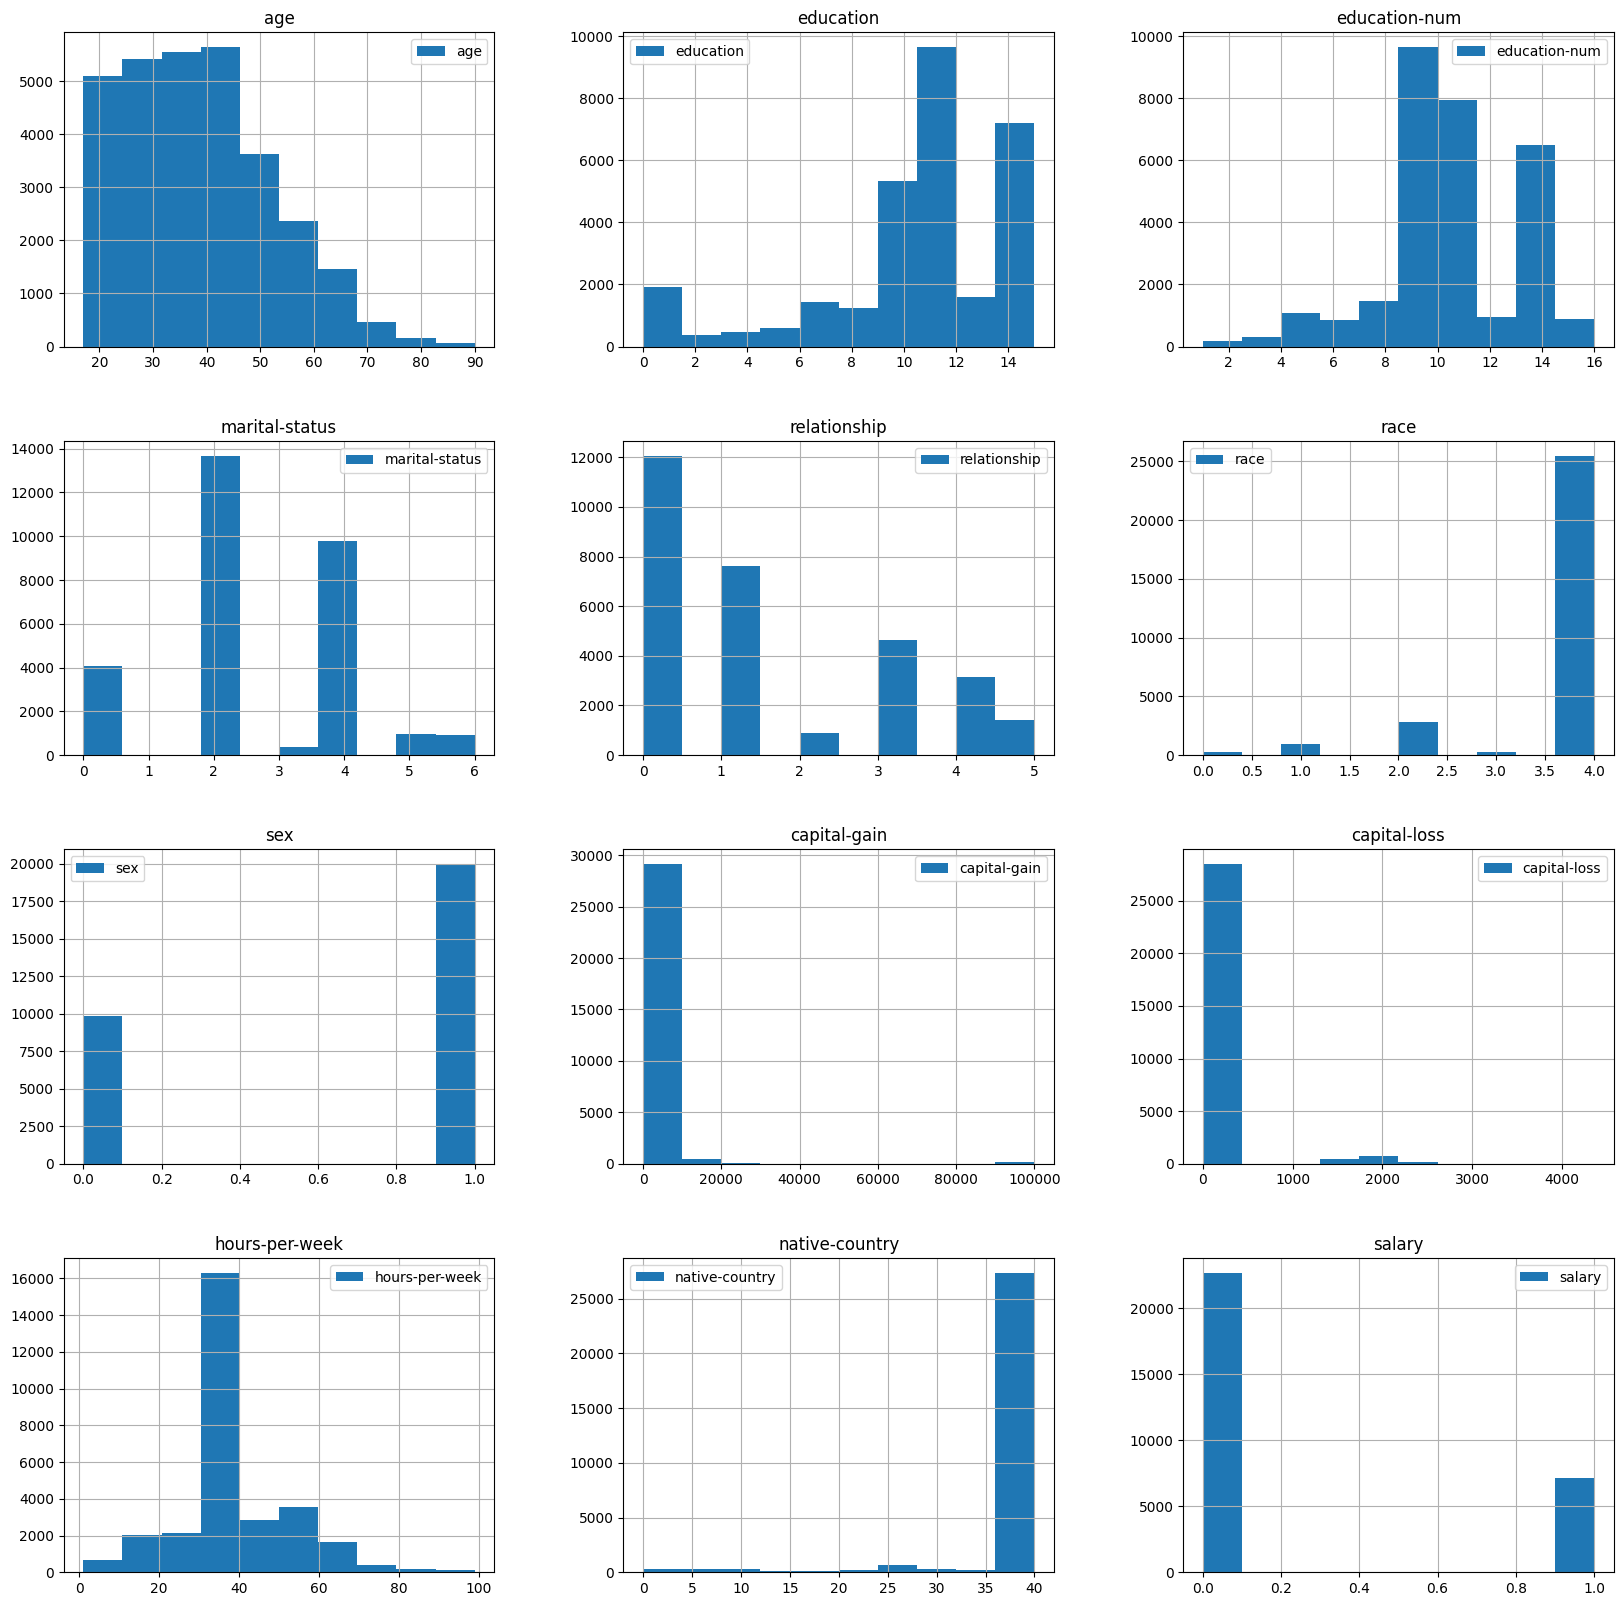

In [23]:
train_df.hist(figsize = (20, 20), legend = True)

10 - In order to improve the model we normalize our data.  

---

### Normalization Techniques

1. **Min-Max Scaling (Normalization):**
   Min-Max scaling scales the data to a specific range, typically [0, 1].
   
   Formula: 
   $$
   \text{Normalized} = \frac{\text{Value} - \text{Min}}{\text{Max} - \text{Min}}
   $$

2. **Z-Score (Standardization):**
   Z-Score transforms data to have a mean of 0 and a standard deviation of 1, suitable for Gaussian-distributed data.
   
   Formula:
   $$
   \text{Standardized} = \frac{\text{Value} - \text{Mean}}{\text{Standard Deviation}}
   $$

3. **Robust Scaling:**
   Robust Scaling is similar to Min-Max scaling but uses the interquartile range (IQR) for a more robust treatment of outliers.
   
   Formula:
   $$
   \text{Robust Scaled} = \frac{\text{Value} - \text{Q1}}{\text{Q3} - \text{Q1}}
   $$

4. **Max Abs Scaling:**
   Max Abs Scaling scales data by dividing each feature by its maximum absolute value.
   
   Formula:
   $$
   \text{Scaled} = \frac{\text{Value}}{\text{Max Abs Value}}
   $$

5. **Unit Vector Scaling:**
   Unit Vector Scaling, or l2 normalization, scales each sample to have a unit norm (length), useful for sparse data.
   
   Formula:
   $$
   \text{Unit Vector} = \frac{\text{Value}}{\| \text{Value} \|_2}
   $$

These normalization techniques serve different purposes and should be chosen based on the characteristics of your data and the requirements of your machine learning algorithm.

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'education-num'}>],
       [<Axes: title={'center': 'marital-status'}>,
        <Axes: title={'center': 'relationship'}>,
        <Axes: title={'center': 'race'}>],
       [<Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'capital-gain'}>,
        <Axes: title={'center': 'capital-loss'}>],
       [<Axes: title={'center': 'hours-per-week'}>,
        <Axes: title={'center': 'native-country'}>,
        <Axes: title={'center': 'salary'}>]], dtype=object)

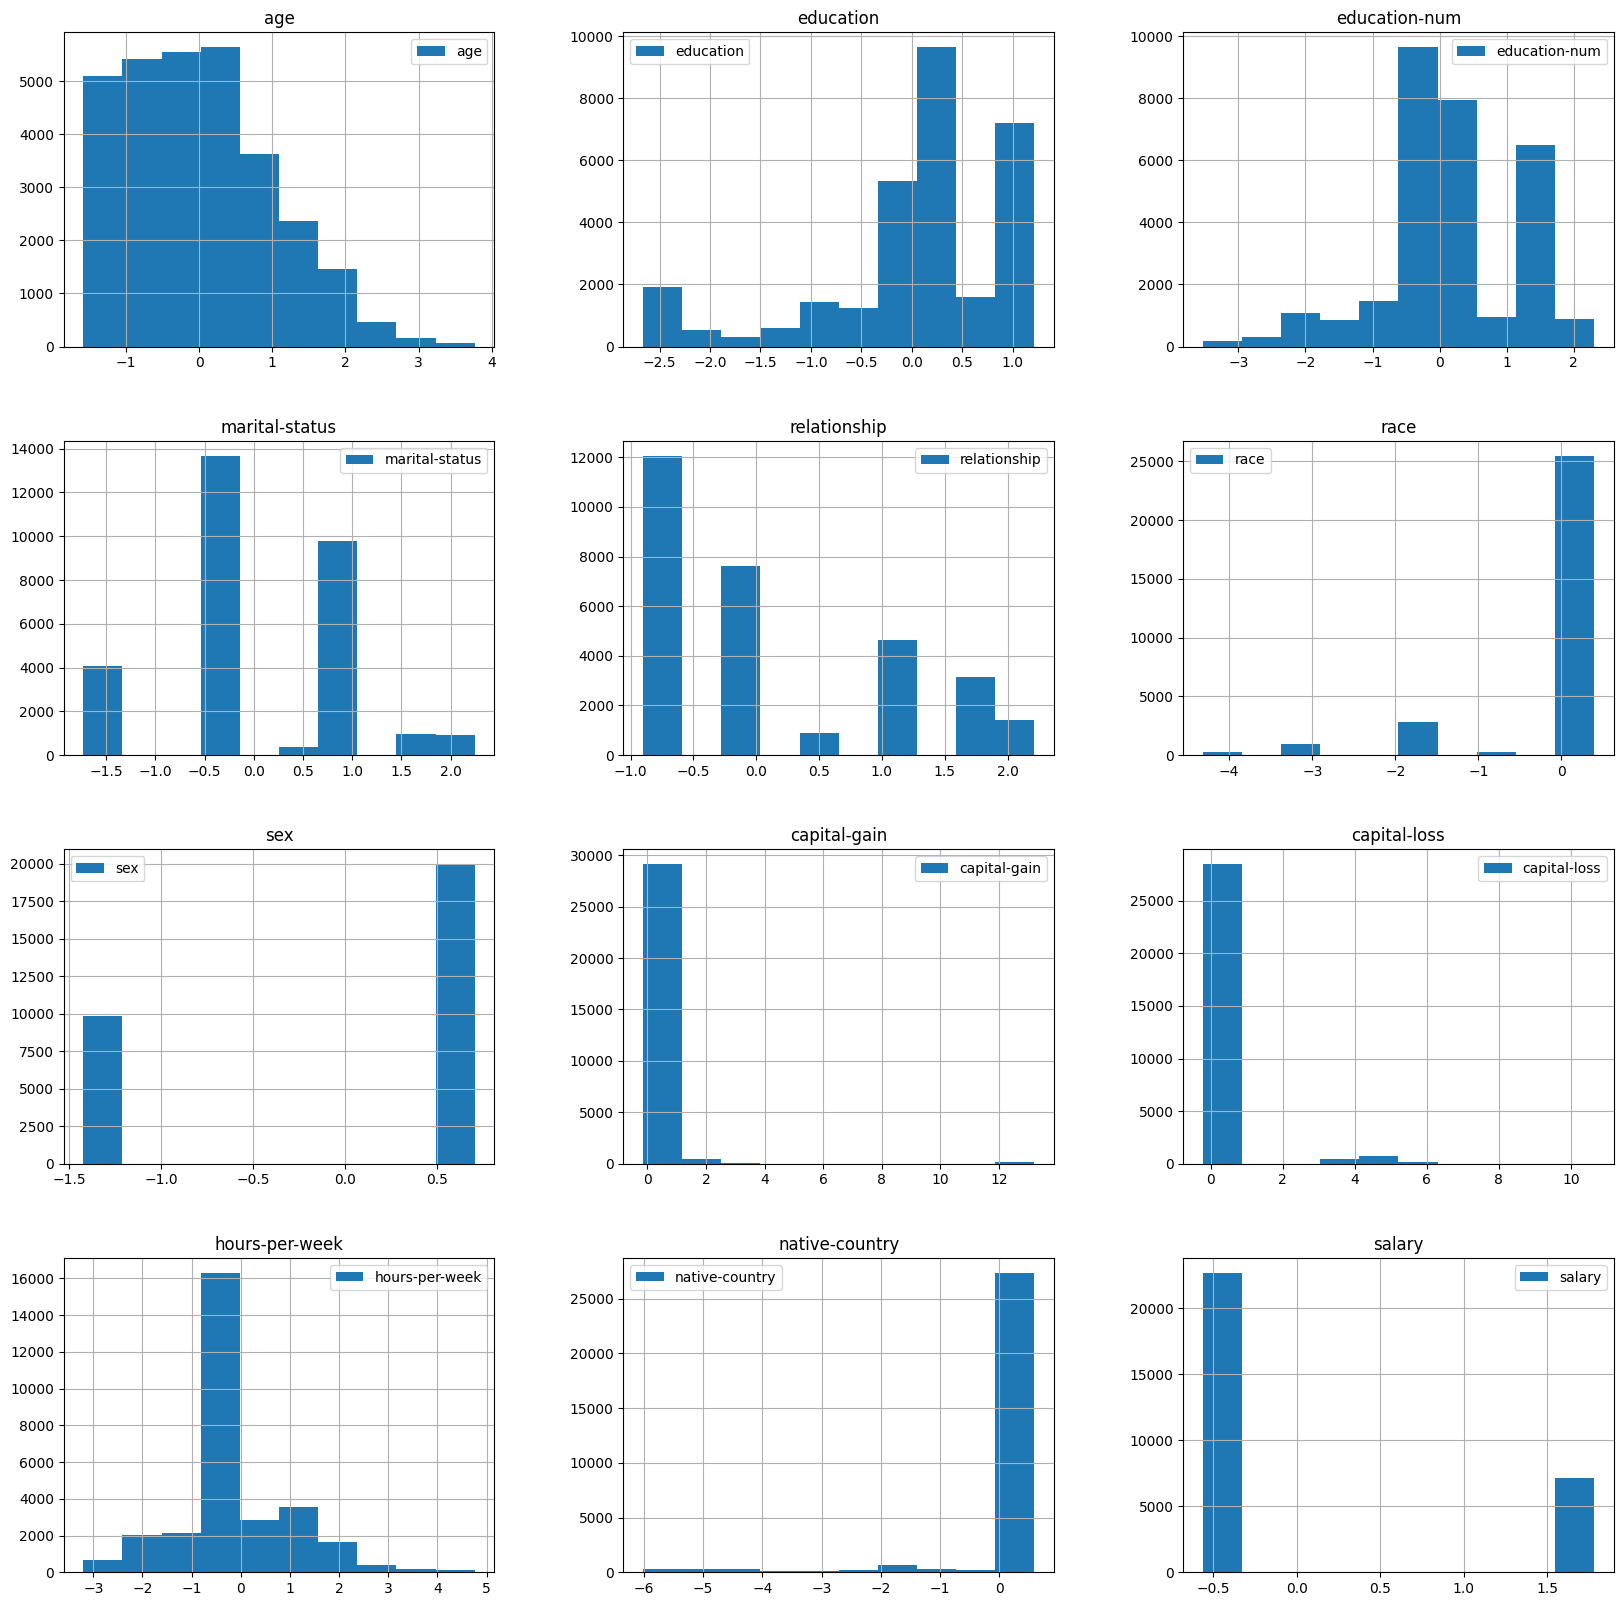

In [24]:
normalized_df = (train_df - train_df.mean()) / train_df.std()
normalized_df.hist(figsize = (20, 20), legend = True)

In [25]:
print(normalized_df.describe().loc[["std", "mean"]])

               age     education  education-num  marital-status  relationship  \
std   1.000000e+00  1.000000e+00   1.000000e+00    1.000000e+00  1.000000e+00   
mean -1.639073e-16  2.491962e-16  -1.243599e-16   -1.150686e-16  6.837410e-17   

              race           sex  capital-gain  capital-loss  hours-per-week  \
std   1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00    1.000000e+00   
mean  2.291843e-16 -4.550332e-17 -1.643837e-17 -4.740922e-17    2.699229e-16   

      native-country        salary  
std     1.000000e+00  1.000000e+00  
mean    3.680766e-16  8.886251e-17  


Each column has std of 1 and almost mean of 0, so it has successfully been normalized.

11 - <br/>

In [26]:
higher_than_50_salary = train_df["salary"] == cat_code_mapping.get("salary", {}).get(">50K", None)
high_salary = normalized_df.loc[higher_than_50_salary]
low_salary = normalized_df.loc[~higher_than_50_salary]

now we compute the mean and standard deviation of each column

In [27]:
high_salary_mean = high_salary.mean()
high_salary_std = high_salary.std()

low_salary_mean = low_salary.mean()
low_salary_std = low_salary.std()


stats = pd.DataFrame({
        "high_salary_mean": high_salary_mean, 
        "high_salary_std": high_salary_std,
        "low_salary_mean": low_salary_mean,
        "low_salary_std": low_salary_std
})

display(stats[["high_salary_mean", "high_salary_std"]])
print("------------------------------------------------------")
display(stats[["low_salary_mean", "low_salary_std"]])

,high_salary_mean,high_salary_std
age,0.414559,7.712003e-01
education,0.134591,7.346369e-01
education-num,0.594376,9.315441e-01
marital-status,-0.353505,5.664315e-01
relationship,-0.445503,9.840132e-01
race,0.130958,8.597122e-01
sex,0.385660,7.577055e-01
capital-gain,0.399265,1.976087e+00
capital-loss,0.261746,1.473212e+00
hours-per-week,0.406811,8.874651e-01


------------------------------------------------------


,low_salary_mean,low_salary_std
age,-0.130817,1.027893e+00
education,-0.042471,1.066660e+00
education-num,-0.187560,9.460967e-01
marital-status,0.111551,1.078173e+00
relationship,0.140582,9.631487e-01
race,-0.041325,1.036940e+00
sex,-0.121698,1.035700e+00
capital-gain,-0.125991,1.314654e-01
capital-loss,-0.082596,7.760948e-01
hours-per-week,-0.128372,9.991788e-01


Subsequently, we will allocate a normal distribution to each row, distinguishing between high and low values based on the given mean and standard deviation. These distributions will then be stored separately for each category within a dictionary.  
To do this we will use [scipy.stats.norm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)

In [28]:
x_values = np.arange(-3, 3, 0.01)

distribution = {}

def draw(row: pd.Series, ax: pltaxes._axes.Axes):
    high_salary_dist = scipy.stats.norm(row["high_salary_mean"], row["high_salary_std"])
    low_salary_dist = scipy.stats.norm(row["low_salary_mean"], row["low_salary_std"])

    distribution[row.name] = (high_salary_dist, low_salary_dist)

    high_salary_pdf = high_salary_dist.pdf(x_values)
    low_salary_pdf = low_salary_dist.pdf(x_values)

    ax.plot(x_values, high_salary_pdf, label="higher than 50k salary", color="green")

    ax.plot(x_values, low_salary_pdf, label="lower than 50k salary", color="blue")

    ax.legend(loc="upper left", frameon=True)
    ax.set_title(row.name)
    ax.set_xlabel("x")
    ax.set_ylabel("pdf")

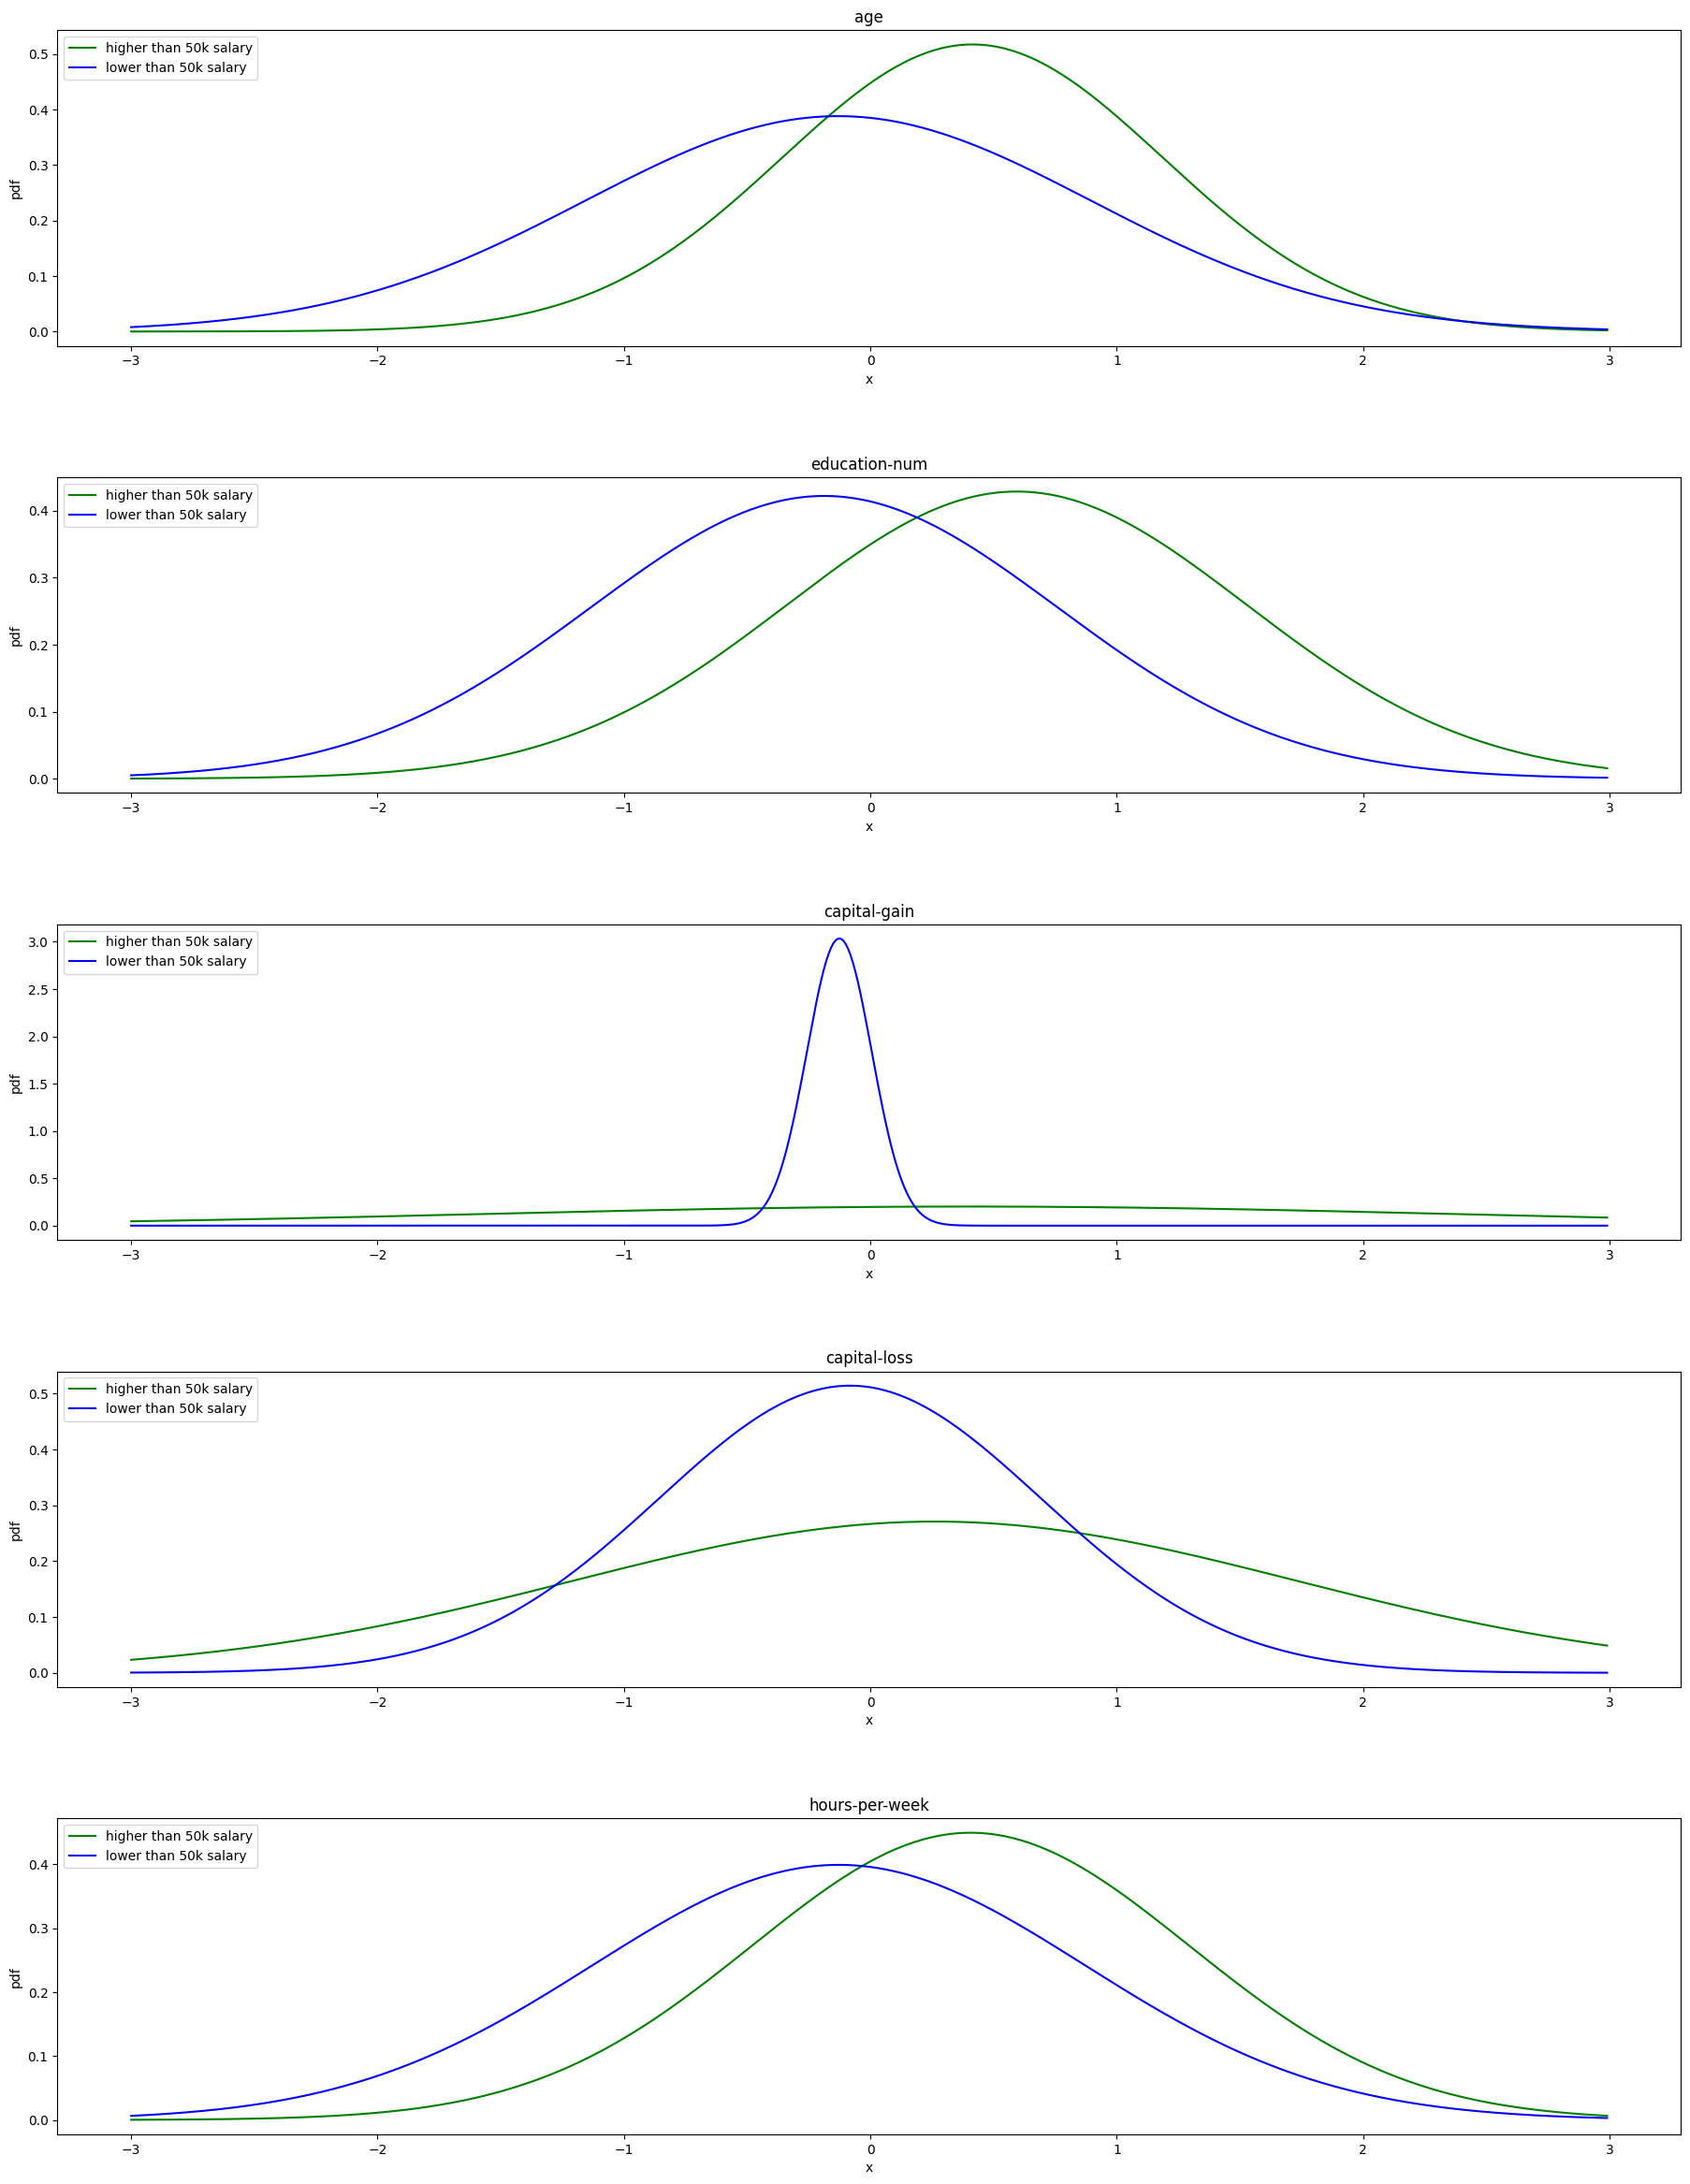

In [29]:
numerics = ["age", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
fig, axes = plt.subplots(figsize = (20, 25), nrows = len(numerics))
fig.tight_layout(pad = 8.0)

ax_index = 0
for index, row in stats.iterrows():
    if row.name not in numerics:
        continue
    draw(row, axes[ax_index])
    ax_index += 1

    
plt.show()

Our objective is to make predictions solely based on a single feature. To achieve this, we select the feature that exerts the most significant influence on salary, meaning that the disparity in $f(salary|feature)$ between high and low salaries is the most prominent based on the graphical representations. According to these graphs, the feature that fulfills this criterion is `capital-gain`.

For the purpose of making decisions relying on `capital-gain`:

We will undertake the computation of both $f(high\text{-}salary|feature)$ and $f(low\text{-}salary|feature)$, subsequently comparing their values. As we lack the explicit method to calculate these probabilities, we resort to Bayesian predictions, providing us with the following formula:

$$f(a|b) = \frac{f(b|a) \times f(a)}{f(b)}$$

This Bayesian formula allows us to estimate the probability of event `a` occurring given the occurrence of event `b`. In our context, it will assist us in determining the likelihood of a high and low salary (`a`) based on the feature `capital-gain` (`b`). Since we want to compare them and both of them are divided by the same denominator, we can ignore the denominator and only compare the numerators. Therefore, we will compare $f(b|a) \times f(a)$ for both high and low salaries.

In [30]:
deciding_feature = "capital-gain"
high_salary_probability = len(high_salary) / len(train_df)
low_salary_probability = len(low_salary) / len(train_df)

In [31]:
def predict_single_person(person : pd.Series):
    high_salary_dist, low_salary_dist = distribution[deciding_feature]
    high_salary_prob = high_salary_dist.pdf(person[deciding_feature]) * high_salary_probability 
    low_salary_prob = low_salary_dist.pdf(person[deciding_feature]) * low_salary_probability 
    return ">50K" if high_salary_prob > low_salary_prob else "<=50K"

In [35]:
test_df = pd.read_csv(TEST_FILE_ADDRESS)

data_needed_for_prediction = test_df[numerics]
train_df = train_df[numerics]

data_needed_for_prediction = (data_needed_for_prediction - train_df.mean()) / train_df.std()

now we predict each of them

In [36]:
predictions = []
for _, row in data_needed_for_prediction.iterrows():
    predictions.append(predict_single_person(row))
    
right_answers = sum(predictions == test_df["salary"])
print(f"accuracy based on capital-gain: {right_answers / len(test_df) * 100}%")

accuracy based on capital-gain: 78.50877192982456%


now we save results

In [34]:
RESULT_FILE_ADDRESS = "assets/data/result.csv"
result_df = pd.DataFrame(predictions)
result_df.to_csv(RESULT_FILE_ADDRESS, index = True)

## Conclusion
with reading and storing data we were able to predict results of new data <br/>
in this project we only used one of the features so it was not too much accurate but still we got a pretty good prediction

# References
- [How to handle Nan](https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/)
- [pandas quick start](https://pandas.pydata.org/docs/getting_started/index.html#getting-started)
- [numpy quick start](https://numpy.org/doc/stable/user/quickstart.html)
- [matplotlib quick start](https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py)
- [Vectorization](https://realpython.com/numpy-array-programming/)
- [scipy stats](https://docs.scipy.org/doc/scipy/reference/stats.html)